In [1]:
import pandas as pd
import pysax
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.html.widgets import interact, fixed

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [17]:
s = pd.read_table(open("data/ECG/chfdb_chf01_275.txt","r"), index_col = 0, header = None, names = ['a','b'])

In [4]:
s.head()

,a,b
275.000,-0.645,0.665
275.004,-0.635,0.710
275.008,-0.645,0.745
275.012,-0.635,0.760
275.016,-0.645,0.785


In [5]:
s.shape

(3751, 2)

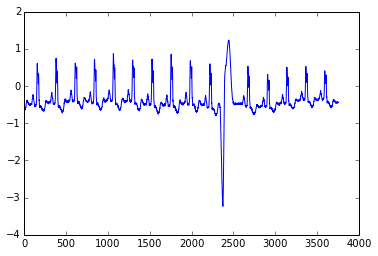

In [6]:
plt.plot(s.a)

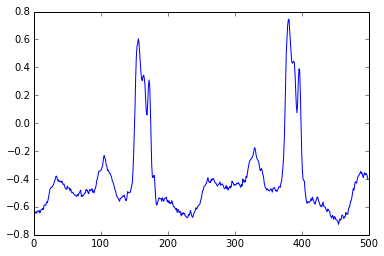

In [7]:
plt.plot(s.a.iloc[:500])

In [90]:
window = 100
stride = 3
nbins = 7
alphabet = "ABCD"
sax = pysax.SAXModel(window = window, stride = stride, nbins = nbins, alphabet=alphabet)
target = sax.symbolize_window(s.a.iloc[100:200])
print "looking for this symbol: %s" %target

looking for this symbol: BBACDCA


In [91]:
%time psymbols = sax.symbolize_signal(np.asarray(s.a))

CPU times: user 1.31 s, sys: 16.6 ms, total: 1.33 s
Wall time: 1.31 s


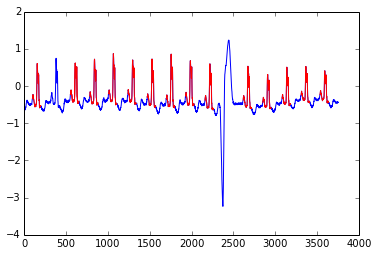

In [92]:
plt.plot(s.a)
for (i, w) in enumerate(psymbols):
    if w == target:
        plt.plot(range(i*stride,i*stride+100), s.a.iloc[i*stride:i*stride+100], 'r')

##tidy up 

In [32]:
def motif_detection(target_start, target_end, stride, nbins, alphabet, threshold):
    """
    ss: the signal as a numpy array 
    target_start, target_end: row number of the start and end of the segment to look for
    """
    window = target_end - target_start + 1
    sax = pysax.SAXModel(window = window, stride = stride, nbins = nbins, alphabet=alphabet)
    target = sax.symbolize_window(ss[target_start:target_end])
    print "looking for this symbol: %s" %target
    
    psymbols = sax.symbolize_signal(ss)
    #plot the result
    plt.plot(ss)
    for (i, w) in enumerate(psymbols):
        if sax.symbol_distance(w, target) <= threshold:
            plt.plot(range(i * stride, i * stride + window), ss[i * stride : i * stride + window], 'r')

looking for this symbol: BADDA


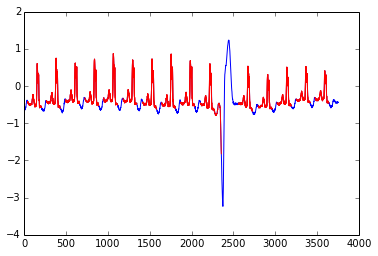

In [35]:
motif_detection(100, 200, stride = 5, nbins = 5, alphabet = "ABCD", threshold = 0.1)

looking for this symbol: ACDDCAAA


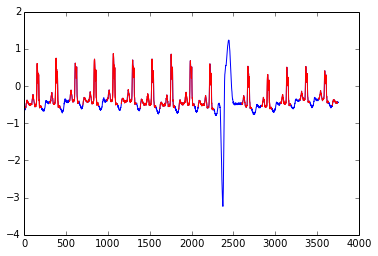

In [33]:
ss=np.asarray(s.a)
interact(motif_detection, target_start=(100,1000,10), target_end=(200,1000,10),
         stride=(1,20,2), nbins=(4, 8, 1), alphabet=["ABCD","ABCDE","ABCDEF"], threshold=(0,3,0.1))